In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells/500_sub'
medians_csv = '20200630_maternal500wo_outliers_bl_medians_per_sample.csv'
medians_filepath = os.path.join(subsample_path, medians_csv)
medians_df = pd.read_csv(medians_filepath)

In [7]:
medians_df.head(5)

,marker,cell_type_v2,compartment2,day,cage,id,median,sample,float_day
0,CD45-retroorbital,B cells,PB-EV,E10.5,6942,8,4.773626,6942_8_E10.5_PB-EV,10.5
1,CD45-retroorbital,B cells,PB-EV,E10.5,6943,15,4.397351,6943_15_E10.5_PB-EV,10.5
2,CD45-retroorbital,B cells,PB-EV,E10.5,6944,16,4.785401,6944_16_E10.5_PB-EV,10.5
3,CD45-retroorbital,B cells,PB-EV,E10.5,6944,17,2.063178,6944_17_E10.5_PB-EV,10.5
4,CD45-retroorbital,B cells,PB-EV,E10.5,9582,15,4.476063,9582_15_E10.5_PB-EV,10.5


In [10]:
mean_medians = medians_df.groupby(['marker','cell_type_v2']).mean()
mean_medians.reset_index(inplace = True)
heatmap_df = mean_medians.pivot_table(index = 'marker', columns = 'cell_type_v2', values = 'median')
heatmap_df = heatmap_df.apply(lambda x:(x-x.min()) / (x.max()-x.min()), axis = 1)
heatmap_plt = heatmap_df.transpose()

In [13]:
cell_color_dict = {'B cells': '#FFFF00',
 'CD4+ T cells': '#FF34FF',
 'CD8+ T cells': '#FF4A46',
 'Eosinophils': '#A30059',
 'Basophils': '#b98cdb',
 'Monocytes': '#552de3',
 'NK cells': '#8FB0FF',
 'Neutrophils': '#8393a3',                   
 'DCs': '#1CE6FF'}

In [14]:
row_colors = heatmap_plt.index.map(cell_color_dict)

In [15]:
clustering = ['Ly-6G', 'CD11c', 'TCRb', 'F480', 'CD3', 
              'IgD', 'IgM','CD19', 'CD8', 'CD11b','TCRgd',
              'Ly-6C','FcERI', 'Siglec-F','CD68', 
              'CD49b', 'CD4', 'MHCII']

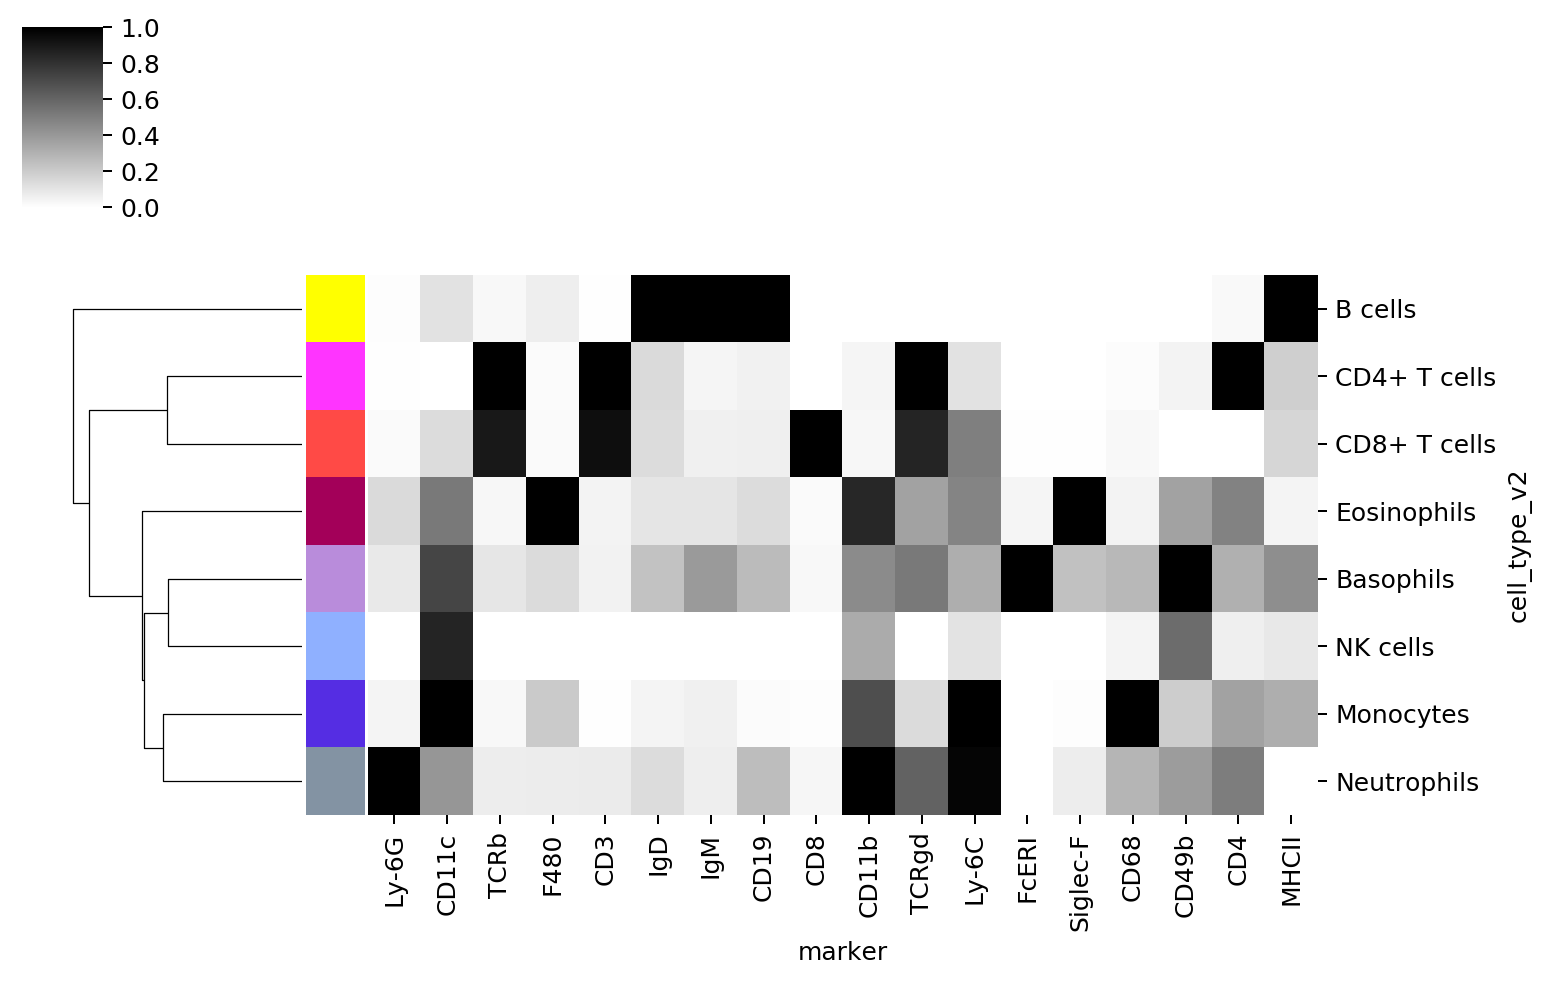

In [17]:
plt.rcParams['figure.dpi'] = 180
cg = sns.clustermap(heatmap_plt.loc[:,clustering], figsize=(9, 5),
               cmap = 'binary', row_colors = row_colors, 
               row_cluster = True, col_cluster = False)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg.cax.set_position((.1,0.8,.05,.2))